In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import matplotlib
from math import pow, sqrt, ceil
from collections import OrderedDict

from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
symbols = {1: "o", 
           2: "D",
           3: '*',           
           4: "<",    
           "DL": "X",
        }

color = {1: "c",  
         2: "r",
         3: "m",
         4: "b",
         "DL": "g",
        }

offset = {1: 0.15, 
           2: 0.05,
           3: -0.05,
           4: -0.15,        
          "DL": 0
        }

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 25

In [6]:
from convert_LabelBox_results import *

In [7]:
path = Path("Results")
statistics = EIPH_Statistics(path)

In [8]:
image_statistics = statistics.calc_statistics_image()
image_statistics['unchanged_boxes_ration'] = image_statistics['unchanged_boxes'] / image_statistics['num_cells']
image_statistics['changed_grade_ration'] = image_statistics['changed_grade'] / image_statistics['num_cells']
image_statistics['unchanged_boxes_ration'] = image_statistics['unchanged_boxes'] / image_statistics['num_cells']
image_statistics

,Initials,Skill,File,Type,Order,Time,Grade,Grade GT,ImageType,Acc,gt_num_cells,num_cells,unchanged_boxes,changed_grade,changed_boxes,unchanged_boxes_ration,changed_grade_ration
0,DL,DL,30_EIPH_588355 Berliner Blau.png,ProjectType.Supervision,LabelOrder.AS,7.908,1.076923,1.076923,ImageType.NoChanges,0.846154,13,13,11,1,1,0.846154,0.076923
1,DL,DL,04_EIPH_567017 Turnbull blue-001.png,ProjectType.Supervision,LabelOrder.AS,2.601,1.000000,1.153846,ImageType.IncreasedGrade,0.846154,13,13,11,2,0,0.846154,0.153846
2,DL,DL,14_EIPH_568381 berliner blau-001.png,ProjectType.Supervision,LabelOrder.AS,3.431,1.666667,1.666667,ImageType.RemovedRects,0.777778,9,9,7,2,0,0.777778,0.222222
3,DL,DL,17_EIPH_575796 Turnbull blue.png,ProjectType.Supervision,LabelOrder.AS,7.306,1.500000,1.333333,ImageType.RemovedRects,0.833333,12,12,10,2,0,0.833333,0.166667
4,DL,DL,23_EIPH_563476 Berliner Blau-001.png,ProjectType.Supervision,LabelOrder.AS,2.018,1.083333,1.166667,ImageType.NoChanges,0.916667,12,12,10,1,1,0.833333,0.083333
5,DL,DL,25_EIPH_568150 Berliner Blau.png,ProjectType.Supervision,LabelOrder.AS,2.634,1.444444,1.666667,ImageType.NoChanges,0.777778,9,9,7,2,0,0.777778,0.222222
6,DL,DL,28_EIPH_569948 L berliner blau.png,ProjectType.Supervision,LabelOrder.AS,2.617,0.111111,0.111111,ImageType.RemovedRects,1.000000,9,9,9,0,0,1.000000,0.000000
7,DL,DL,01_EIPH_563479 Turnbull blue.png,ProjectType.Supervision,LabelOrder.AS,2.326,1.333333,1.500000,ImageType.IncreasedGrade,0.555556,10,9,5,4,0,0.555556,0.444444
8,DL,DL,08_EIPH_574999 Berliner Blau.png,ProjectType.Supervision,LabelOrder.AS,1.690,1.857143,2.000000,ImageType.IncreasedGrade,0.857143,14,14,11,2,1,0.785714,0.142857
9,DL,DL,15_EIPH_568320 berliner blau.png,ProjectType.Supervision,LabelOrder.AS,2.619,1.583333,1.666667,ImageType.NoChanges,0.833333,12,12,11,1,0,0.916667,0.083333


In [9]:
# Annotation  -> ImageType.NoChanges
annotation = image_statistics[image_statistics['Type'] == ProjectType.Supervision]


for column in ['unchanged_boxes_ration', 'unchanged_boxes', 'changed_grade', 'changed_boxes', 'Time']:
    for type_name in [ImageType.NoChanges, ImageType.IncreasedGrade, ImageType.RemovedRects]:
    
        image_type = annotation[annotation['ImageType'] == type_name]
    
        
        df = image_type[image_type['Initials'] != "DL"][column] 
        
        print( str(type_name) + " " + column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))
        
    print("")
    print("")

ImageType.NoChanges unchanged_boxes_ration: Min: 0.00 Max: 1.00  Mean: 0.72  STD: 0.32
ImageType.IncreasedGrade unchanged_boxes_ration: Min: 0.00 Max: 0.89  Mean: 0.16  STD: 0.21
ImageType.RemovedRects unchanged_boxes_ration: Min: 0.00 Max: 1.00  Mean: 0.71  STD: 0.32


ImageType.NoChanges unchanged_boxes: Min: 0.00 Max: 14.00  Mean: 8.68  STD: 3.90
ImageType.IncreasedGrade unchanged_boxes: Min: 0.00 Max: 11.00  Mean: 1.73  STD: 2.36
ImageType.RemovedRects unchanged_boxes: Min: 0.00 Max: 14.00  Mean: 8.05  STD: 4.10


ImageType.NoChanges changed_grade: Min: 0.00 Max: 4.00  Mean: 0.31  STD: 0.69
ImageType.IncreasedGrade changed_grade: Min: 0.00 Max: 13.00  Mean: 6.02  STD: 4.06
ImageType.RemovedRects changed_grade: Min: 0.00 Max: 3.00  Mean: 0.28  STD: 0.66


ImageType.NoChanges changed_boxes: Min: 0.00 Max: 14.00  Mean: 3.01  STD: 3.92
ImageType.IncreasedGrade changed_boxes: Min: 0.00 Max: 16.00  Mean: 3.67  STD: 4.50
ImageType.RemovedRects changed_boxes: Min: 0.00 Max: 17.00  Mean: 3.

In [10]:
image_statistics['num_cells'].sum()

6947

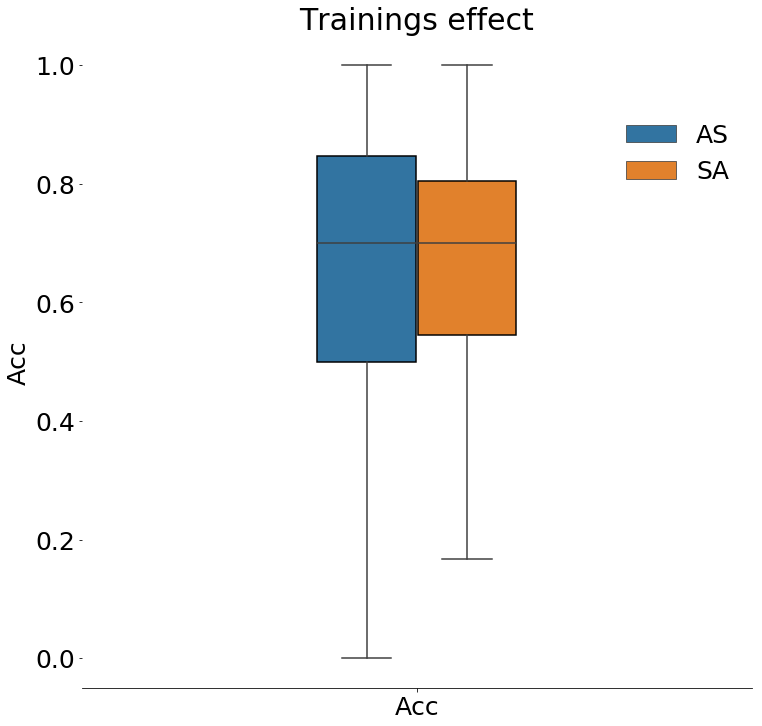

In [11]:
acc_statistics = image_statistics[image_statistics['Type'] == ProjectType.Annotation]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['Acc']
temp_data = pd.melt(acc_statistics[columns])
temp_data['Order'] = len(columns) * [str(type).split('.')[-1] for type in list(acc_statistics['Order'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='Order') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Acc", xlabel="", title="Trainings effect")
sns.despine(left=True)

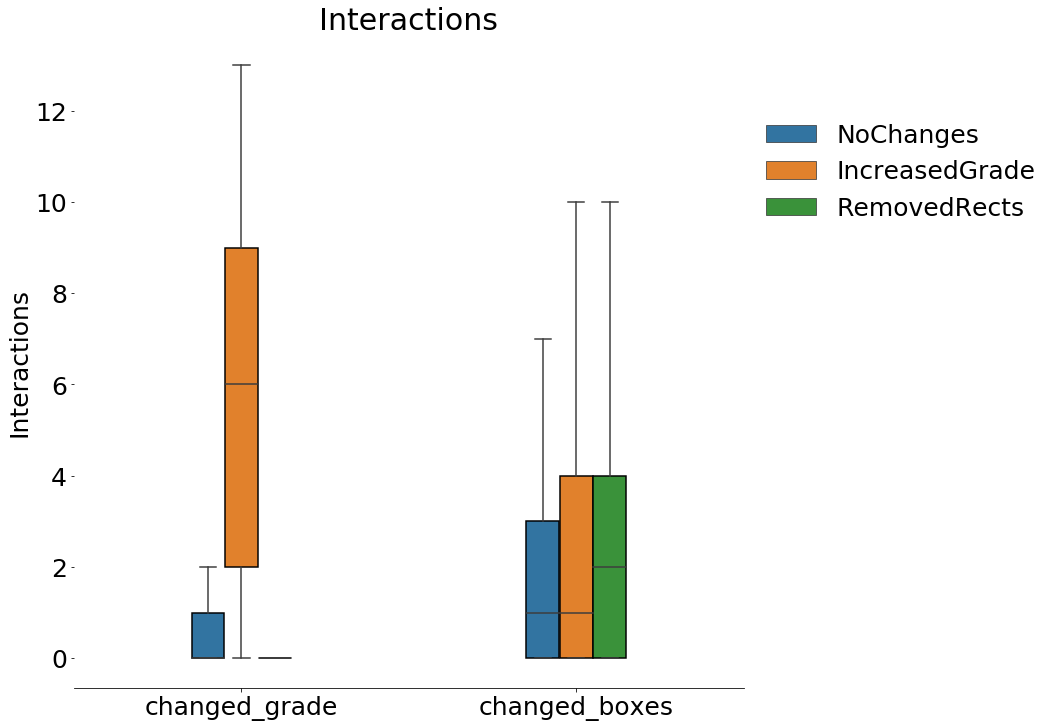

In [12]:
time_statistics = image_statistics[image_statistics['Type'] == ProjectType.Supervision]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['changed_grade', 'changed_boxes']
temp_data = pd.melt(time_statistics[columns])
temp_data['ImageType'] = len(columns) * [str(type).split('.')[-1] for type in list(time_statistics['ImageType'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='ImageType') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Interactions", xlabel="", title="Interactions")
sns.despine(left=True)

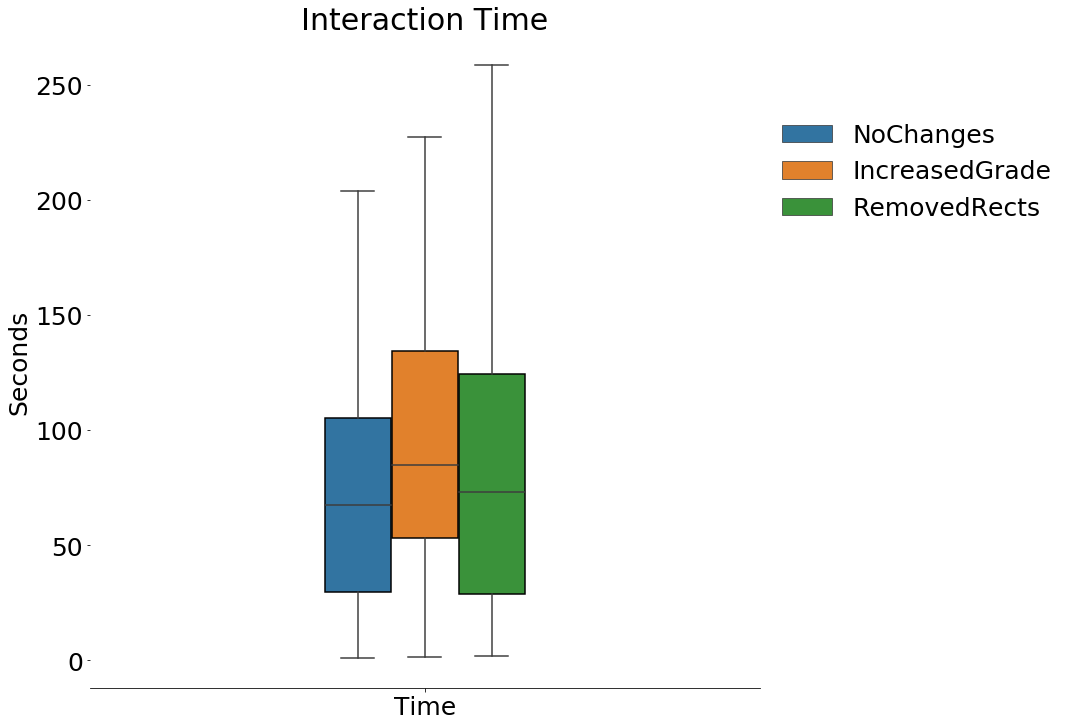

In [13]:
time_statistics = image_statistics[image_statistics['Type'] == ProjectType.Supervision]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['Time']
temp_data = pd.melt(time_statistics[columns])
temp_data['ImageType'] = len(columns) * [str(type).split('.')[-1] for type in list(time_statistics['ImageType'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='ImageType') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Seconds", xlabel="", title="Interaction Time")
sns.despine(left=True)

In [14]:
statistics_intra_observer = statistics.calc_statistics_intra_observer()
statistics_intra_observer

,Initials,Skill,Order,Grade-Error,Kappa,mAP,mAP-IG,Acc
0,DL,DL,LabelOrder.AS,0.000000,0.976782,1.000000,1.000000,0.982979
1,SE,2,LabelOrder.SA,0.133080,0.565379,0.392915,0.746324,0.669643
2,RK,4,LabelOrder.SA,-0.116392,0.587849,0.406171,0.795050,0.676768
3,CB,4,LabelOrder.AS,0.027955,0.811753,0.748701,0.915706,0.860987
4,MH,3,LabelOrder.AS,0.009284,0.831000,0.730057,0.848606,0.868778
5,JA,1,LabelOrder.SA,0.300214,0.444019,0.326740,0.774868,0.571429
6,SC,1,LabelOrder.SA,-0.273107,0.505211,0.361470,0.758877,0.607527
7,PM,2,LabelOrder.AS,-0.134309,0.561772,0.318144,0.619121,0.664948
8,CM,3,LabelOrder.AS,-0.045467,0.522819,0.430398,0.864129,0.634259
9,SG,2,LabelOrder.SA,0.093178,0.649570,0.478638,0.893418,0.725225


In [15]:
for column in ['Acc', 'Kappa', 'mAP', 'Grade-Error']:
    df = statistics_intra_observer[statistics_intra_observer['Initials'] != "DL"][column] 
    print(column + ": Min: {} Max: {}  Mean: {}  STD: {}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.5714285714285714 Max: 0.8687782805429864  Mean: 0.6977293058644951  STD: 0.09836797500455624
Kappa: Min: 0.4440189542123534 Max: 0.830999657200116  Mean: 0.6088191280407865  STD: 0.1256259556606218
mAP: Min: 0.3181439815450756 Max: 0.7487008327366522  Mean: 0.46591495177393827  STD: 0.1535416281597446
Grade-Error: Min: -0.27310703185703145 Max: 0.3002140732074945  Mean: -0.000618103659899215  STD: 0.15833362852525


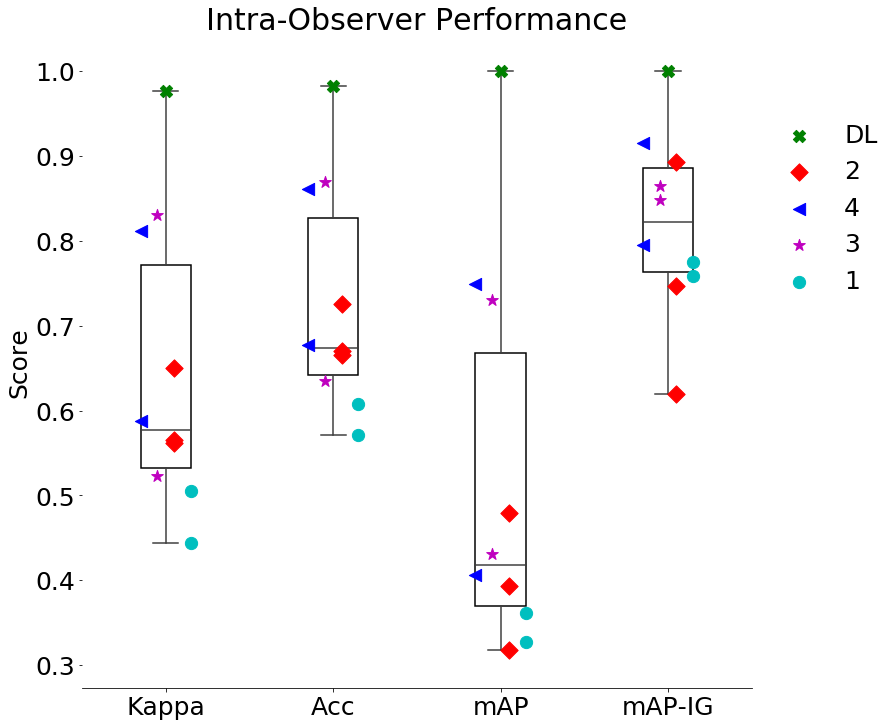

In [16]:
f, ax = plt.subplots(figsize=(12, 12))

temp_data = pd.melt(statistics_intra_observer[['Kappa', 'Acc', 'mAP', 'mAP-IG']])
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False) #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

for index, row in enumerate(statistics_intra_observer.values.tolist()):
    name = row[1]
    kappa = row[4]
    mAP = row[5]
    mAP_IG = row[6]
    acc = row[7]

    plt.scatter(x=0 + offset[name], y=kappa, marker=symbols[name], s=150, c=color[name], zorder=100)
    plt.scatter(x=1 + offset[name], y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)
    
    plt.scatter(x=2 + offset[name], y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    plt.scatter(x=3 + offset[name], y=mAP_IG, marker=symbols[name], s=150, c=color[name], zorder=100)
    


#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Intra-Observer Performance")
sns.despine(left=True)

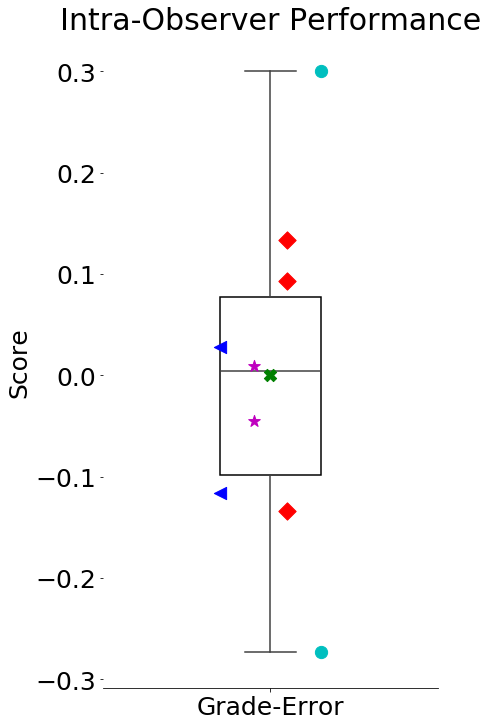

In [17]:
from collections import OrderedDict

f, ax = plt.subplots(figsize=(6, 12))

temp_data = pd.melt(statistics_intra_observer[['Grade-Error']])
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, whis=[0, 100]) #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    
for index, row in enumerate(statistics_intra_observer.values.tolist()):
    name = row[1]
    grade = row[3]

    plt.scatter(x=0 + offset[name], y=grade, marker=symbols[name], s=150, c=color[name], zorder=100)
    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Intra-Observer Performance")
sns.despine(left=True)

In [18]:
statistics_initials = statistics.calc_statistics_initials()
statistics_initials

,Initials,Skill,mAP,mAP-IG,Acc,ratio_decreased_cells,ratio_removed_boxes,seconds,grade,num_cells,num_interactionen,Order,Type
0,DL,DL,0.742524,0.990582,0.866379,66.071429,100.0,2.3735,1.257698,235,NaN,LabelOrder.AS,ProjectType.Supervision
1,DL,DL,0.742524,0.990582,0.866379,66.071429,100.0,2.3735,1.257698,235,NaN,LabelOrder.AS,ProjectType.Annotation
2,MB,3,0.607085,0.958643,0.777311,28.571429,60.0,79.5860,1.529922,241,NaN,LabelOrder.SA,ProjectType.Supervision
3,SE,2,0.555760,0.933413,0.744493,16.071429,100.0,81.9200,1.532446,242,NaN,LabelOrder.SA,ProjectType.Supervision
4,SE,2,0.420701,0.748369,0.686364,33.333333,100.0,121.7275,1.399366,279,NaN,LabelOrder.SA,ProjectType.Annotation
5,RK,4,0.632501,0.971555,0.780702,33.928571,60.0,53.4530,1.539760,229,NaN,LabelOrder.SA,ProjectType.Supervision
6,RK,4,0.388037,0.814069,0.633166,50.000000,80.0,66.7320,1.656151,211,NaN,LabelOrder.SA,ProjectType.Annotation
7,CB,4,0.729847,0.939224,0.872807,57.142857,80.0,138.3255,1.337494,237,NaN,LabelOrder.AS,ProjectType.Supervision
8,CB,4,0.634980,0.882217,0.834862,57.142857,100.0,79.2870,1.309538,231,NaN,LabelOrder.AS,ProjectType.Annotation
9,MH,3,0.490859,0.927580,0.690265,27.777778,60.0,119.7415,1.602292,235,NaN,LabelOrder.AS,ProjectType.Supervision


In [19]:
# Annotation
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]

for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = annotation[annotation['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.50 Max: 0.83  Mean: 0.65  STD: 0.07
mAP: Min: 0.26 Max: 0.63  Mean: 0.41  STD: 0.09
seconds: Min: 48.00 Max: 237.93  Mean: 98.41  STD: 47.33
grade: Min: 1.21 Max: 1.85  Mean: 1.55  STD: 0.19


In [20]:
# Supervision

supervision = statistics_initials[statistics_initials['Type'] == ProjectType.Supervision]
for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = supervision[supervision['Initials'] != "DL"][column] 
    
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.64 Max: 0.88  Mean: 0.76  STD: 0.06
mAP: Min: 0.38 Max: 0.79  Mean: 0.59  STD: 0.10
seconds: Min: 12.38 Max: 138.33  Mean: 77.54  STD: 35.14
grade: Min: 1.34 Max: 1.66  Mean: 1.54  STD: 0.08


In [21]:
(statistics_initials['seconds'].sum() * 20) / 60

803.8001666666665

In [22]:
acc_statistics

,Initials,Skill,File,Type,Order,Time,Grade,Grade GT,ImageType,Acc,gt_num_cells,num_cells,unchanged_boxes,changed_grade,changed_boxes,unchanged_boxes_ration,changed_grade_ration
20,DL,DL,30_EIPH_588355 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,7.908,1.076923,1.076923,ImageType.NoChanges,0.846154,13,13,11,1,1,0.846154,0.076923
21,DL,DL,04_EIPH_567017 Turnbull blue-001.png,ProjectType.Annotation,LabelOrder.AS,2.601,1.000000,1.153846,ImageType.IncreasedGrade,0.846154,13,13,11,2,0,0.846154,0.153846
22,DL,DL,14_EIPH_568381 berliner blau-001.png,ProjectType.Annotation,LabelOrder.AS,3.431,1.666667,1.666667,ImageType.RemovedRects,0.777778,9,9,7,2,0,0.777778,0.222222
23,DL,DL,17_EIPH_575796 Turnbull blue.png,ProjectType.Annotation,LabelOrder.AS,7.306,1.500000,1.333333,ImageType.RemovedRects,0.833333,12,12,10,2,0,0.833333,0.166667
24,DL,DL,23_EIPH_563476 Berliner Blau-001.png,ProjectType.Annotation,LabelOrder.AS,2.018,1.083333,1.166667,ImageType.NoChanges,0.916667,12,12,10,1,1,0.833333,0.083333
25,DL,DL,25_EIPH_568150 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,2.634,1.444444,1.666667,ImageType.NoChanges,0.777778,9,9,7,2,0,0.777778,0.222222
26,DL,DL,28_EIPH_569948 L berliner blau.png,ProjectType.Annotation,LabelOrder.AS,2.617,0.111111,0.111111,ImageType.RemovedRects,1.000000,9,9,9,0,0,1.000000,0.000000
27,DL,DL,01_EIPH_563479 Turnbull blue.png,ProjectType.Annotation,LabelOrder.AS,2.326,1.333333,1.500000,ImageType.IncreasedGrade,0.555556,10,9,5,4,0,0.555556,0.444444
28,DL,DL,08_EIPH_574999 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,1.690,1.857143,2.000000,ImageType.IncreasedGrade,0.857143,14,14,11,2,1,0.785714,0.142857
29,DL,DL,15_EIPH_568320 berliner blau.png,ProjectType.Annotation,LabelOrder.AS,2.619,1.583333,1.666667,ImageType.NoChanges,0.833333,12,12,11,1,0,0.916667,0.083333


In [23]:
# Annotation -> LabelOrder.SA
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
sa_mode =  annotation[annotation['Order'] == LabelOrder.SA] 

for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = sa_mode[sa_mode['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.63 Max: 0.70  Mean: 0.67  STD: 0.02
mAP: Min: 0.39 Max: 0.46  Mean: 0.42  STD: 0.03
seconds: Min: 48.92 Max: 121.73  Mean: 82.86  STD: 26.89
grade: Min: 1.21 Max: 1.85  Mean: 1.54  STD: 0.22


In [24]:
# Annotation -> LabelOrder.AS
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
as_mode =  annotation[annotation['Order'] == LabelOrder.AS] 

for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = as_mode[as_mode['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.50 Max: 0.83  Mean: 0.65  STD: 0.09
mAP: Min: 0.26 Max: 0.63  Mean: 0.40  STD: 0.11
seconds: Min: 48.00 Max: 237.93  Mean: 106.19  STD: 53.08
grade: Min: 1.31 Max: 1.82  Mean: 1.56  STD: 0.17


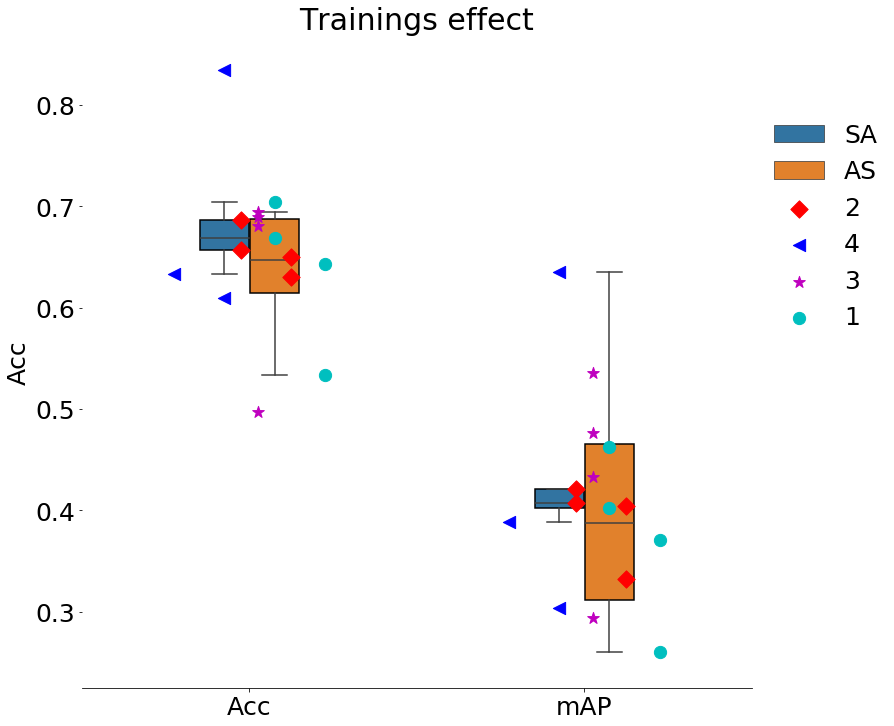

In [25]:
acc_statistics = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
acc_statistics = acc_statistics[acc_statistics['Initials'] != "DL"]

f, ax = plt.subplots(figsize=(12, 12))

columns = ['Acc', 'mAP']
temp_data = pd.melt(acc_statistics[columns])
temp_data['Order'] = len(columns) * [str(type).split('.')[-1] for type in list(acc_statistics['Order'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='Order') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(acc_statistics.values.tolist()):
    name = row[1]
    
    type = str(row[-2])
    acc = row[4]
    mAP = row[2]

    type_offset = -0.075
    if "AS" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=acc, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    
    plt.scatter(x=1 + offset[name] + type_offset, y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    

    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Acc", xlabel="", title="Trainings effect")
sns.despine(left=True)

In [26]:
statistics_initials_supervision = statistics_initials[statistics_initials['Type'] == ProjectType.Supervision]
statistics_initials_supervision

,Initials,Skill,mAP,mAP-IG,Acc,ratio_decreased_cells,ratio_removed_boxes,seconds,grade,num_cells,num_interactionen,Order,Type
0,DL,DL,0.742524,0.990582,0.866379,66.071429,100.0,2.3735,1.257698,235,NaN,LabelOrder.AS,ProjectType.Supervision
2,MB,3,0.607085,0.958643,0.777311,28.571429,60.0,79.5860,1.529922,241,NaN,LabelOrder.SA,ProjectType.Supervision
3,SE,2,0.555760,0.933413,0.744493,16.071429,100.0,81.9200,1.532446,242,NaN,LabelOrder.SA,ProjectType.Supervision
5,RK,4,0.632501,0.971555,0.780702,33.928571,60.0,53.4530,1.539760,229,NaN,LabelOrder.SA,ProjectType.Supervision
7,CB,4,0.729847,0.939224,0.872807,57.142857,80.0,138.3255,1.337494,237,NaN,LabelOrder.AS,ProjectType.Supervision
9,MH,3,0.490859,0.927580,0.690265,27.777778,60.0,119.7415,1.602292,235,NaN,LabelOrder.AS,ProjectType.Supervision
12,JA,1,0.570649,0.948131,0.751092,26.785714,80.0,91.3600,1.507703,242,NaN,LabelOrder.SA,ProjectType.Supervision
15,SC,1,0.565732,0.958932,0.746725,12.500000,60.0,71.4495,1.579943,234,NaN,LabelOrder.SA,ProjectType.Supervision
17,PM,2,0.552241,0.969074,0.726872,10.714286,60.0,27.4140,1.596753,230,NaN,LabelOrder.AS,ProjectType.Supervision
20,CM,3,0.790488,0.977604,0.881579,46.428571,80.0,12.3820,1.418980,229,NaN,LabelOrder.AS,ProjectType.Supervision


In [27]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}%'.format(v=val)
    return my_autopct

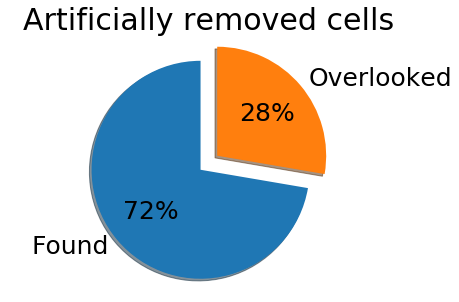

In [28]:
found = np.mean(statistics_initials_supervision["ratio_removed_boxes"].values)
not_found = 100 - found

labels = ['Found', 'Overlooked']
sizes = [found, not_found]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()

ax1.set_title('Artificially removed cells')
#ax1.set_xlabel('Grade with cell count')

ax1.pie(sizes, explode=explode, labels=labels, #, colors = ['b', 'g', 'r', 'c', 'm']
        shadow=True, startangle=90, autopct=make_autopct(sizes))
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout(pad=0)
plt.show()

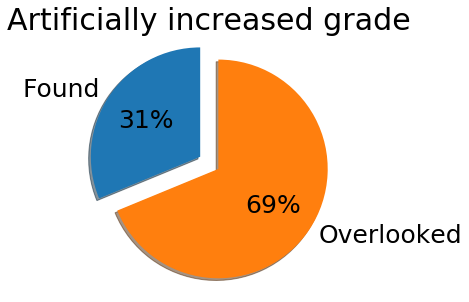

In [29]:
found = np.mean(statistics_initials_supervision["ratio_decreased_cells"].values)
not_found = 100 - found

labels = ['Found', 'Overlooked']
sizes = [found, not_found]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()

ax1.set_title('Artificially increased grade')
#ax1.set_xlabel('Grade with cell count')

ax1.pie(sizes, explode=explode, labels=labels, #, colors = ['b', 'g', 'r', 'c', 'm']
        shadow=True, startangle=90, autopct=make_autopct(sizes))
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout(pad=0)
plt.show()

In [30]:
columns = ['Acc', 'mAP', 'mAP-IG']
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

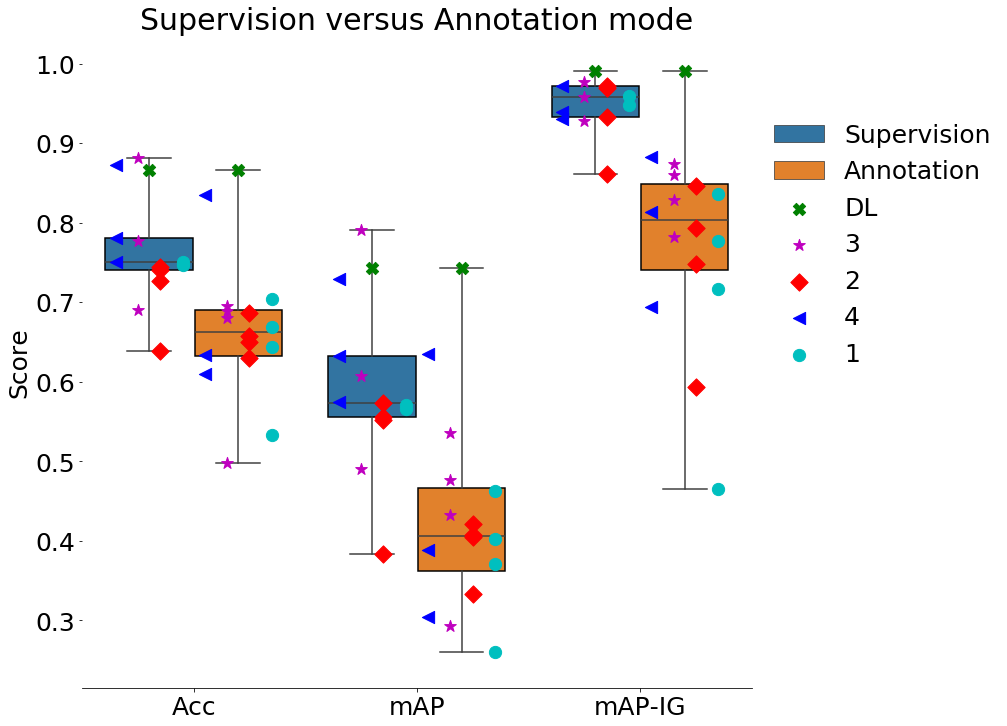

In [31]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100], dodge=True) # width=.3,  
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.values.tolist()):
    name = row[1]
    
    mAP = row[2]
    mAP_IG = row[3]
    acc = row[4]
    type = str(row[-1])

    type_offset = 0.2
    if "Supervision" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)    
    plt.scatter(x=1 + offset[name] + type_offset, y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    plt.scatter(x=2 + offset[name] + type_offset, y=mAP_IG, marker=symbols[name], s=150, c=color[name], zorder=100)


#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Supervision versus Annotation mode")
sns.despine(left=True)

In [32]:
columns = ['seconds']
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

In [33]:
offset = {1: 0.05, 
           2: 0.025,
           3: -0.025,
           4: -0.05,  
          "DL": 0
        }

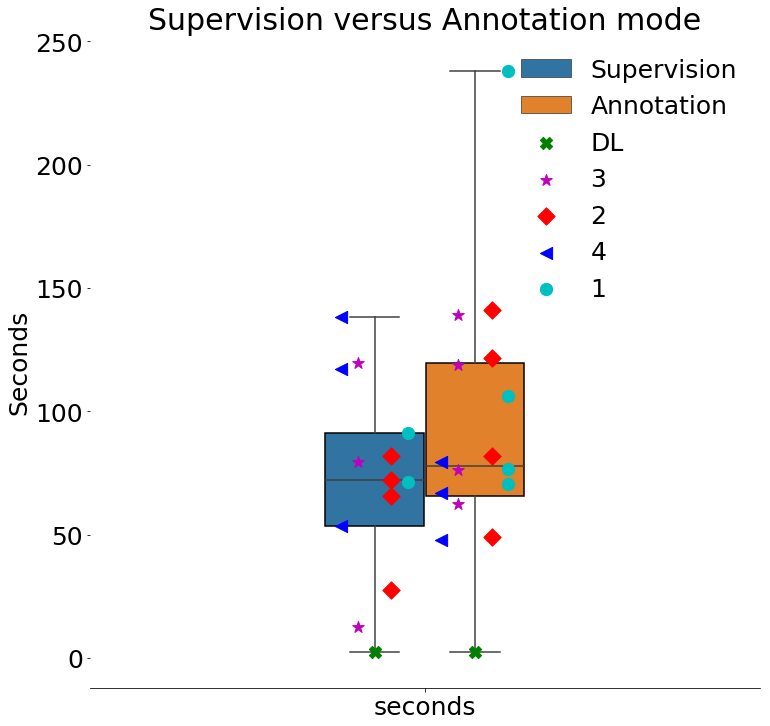

In [34]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100],  width=.3, dodge=True) # width=.3,  
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[7]

    type_offset = 0.075
    if "Supervision" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    


#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), prop={'size': 25}, frameon=False) #, bbox_to_anchor=(1., 0.9)

ax.set(ylabel="Seconds", xlabel="", title="Supervision versus Annotation mode")
sns.despine(left=True)

In [35]:
columns = ['grade']
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

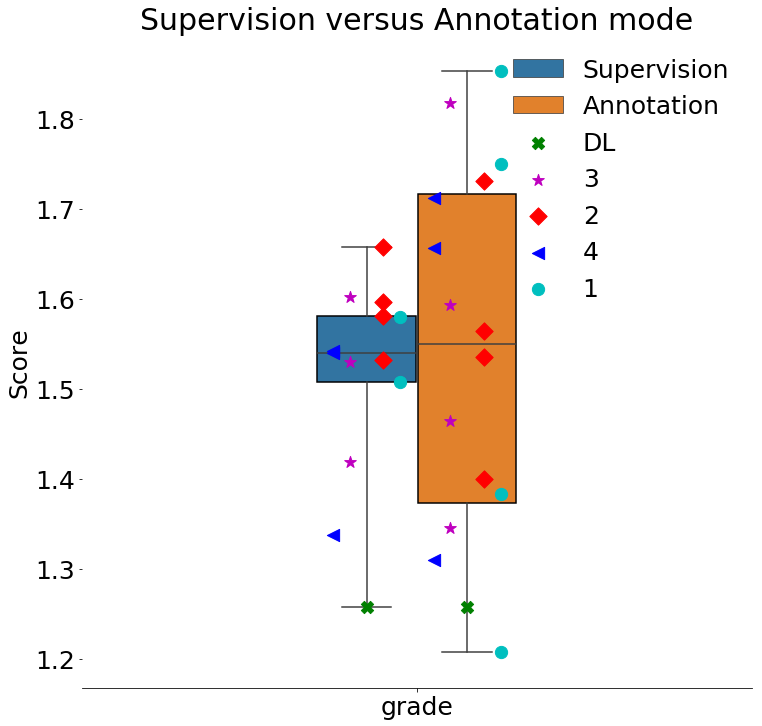

In [36]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100],  width=.3, dodge=True) # width=.3,  
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[8]

    type_offset = 0.075
    if "Supervision" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    


#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), prop={'size': 25}, frameon=False) #, bbox_to_anchor=(1., 0.9)

ax.set(ylabel="Score", xlabel="", title="Supervision versus Annotation mode")
sns.despine(left=True)

In [37]:
cm_annotation = statistics.calc_confusion_matrix(ProjectType.Annotation)
cm_supervision = statistics.calc_confusion_matrix(ProjectType.Supervision)

cm_supervision

array([[641, 131,  11,   1,   0],
       [ 22, 815, 208,  10,  13],
       [  0,   6, 489, 177,   3],
       [  0,   0,  12, 183,  87],
       [  0,   0,   0,   8, 146]])

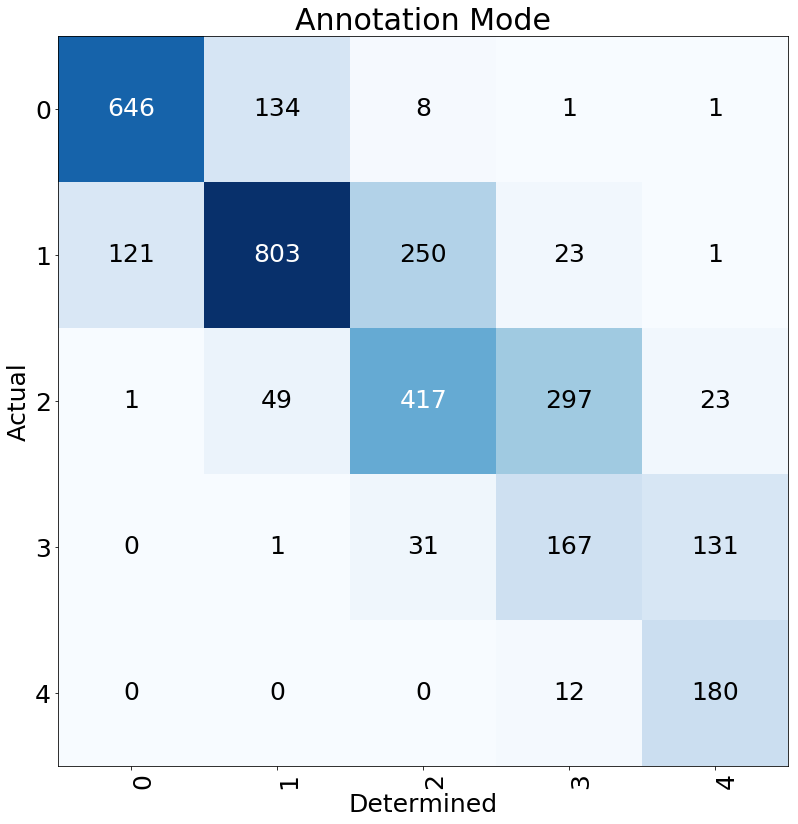

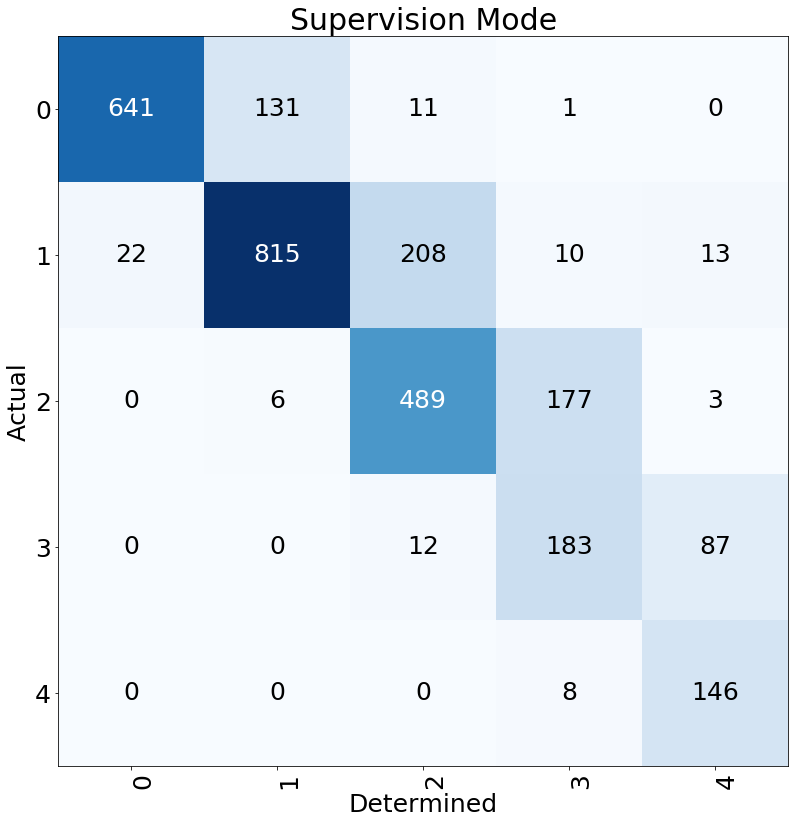

In [38]:
for title, cm in [("Annotation Mode", cm_annotation), ("Supervision Mode", cm_supervision)]:
    cmap = plt.cm.Blues
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)


    ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   # ... and label them with the respective list entries
                   xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4],
                   title=title,
                   ylabel="Actual",
                   xlabel="Determined")

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'#'.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                            ha="center", va="center",
                            color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

### Kappa 

In [39]:
statistics.calc_fleiss_kappa(ProjectType.Supervision)

0.7064267718943523

In [40]:
statistics.calc_fleiss_kappa(ProjectType.Annotation)

0.5002831038973641